The data set used here will be Car_MPG data set, where MPG (Miles / Gallon) is the target variable for variety of cars
- Before proceeding for building regression model , let us explore the data using Clustering techniques to check whether single regression model will be good enough to predict the target variable

Note : The data naturally has 3 clusters with respect to origin of the car, however in case of hidden clusters and the various relations b/w independent & target variable in the data, sometimes linear regression may not be efficient. So let us explore .....


In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('car-mpg.csv')

In [4]:
df.shape

(398, 10)

In [5]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [8]:
# We can see hp is missing above and the data type of hp is object

df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
car_name     object
dtype: object

In [9]:
temp = pd.DataFrame(df.hp.str.isdigit())

In [11]:
temp.dtypes

hp    bool
dtype: object

In [13]:
temp[temp['hp']==False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [14]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

In [15]:
df['hp'].unique()  ## We can see '?' is the object

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [16]:
df=df.replace('?', np.nan)

In [17]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

In [18]:
df['hp']=df['hp'].astype('float64')

In [19]:
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
car_name     object
dtype: object

In [21]:
df.head(2)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,buick skylark 320


In [20]:
numeric_col=df.drop('car_name',axis=1)

In [22]:
numeric_col=numeric_col.apply(lambda x: x.fillna(x.median()), axis=0)

In [23]:
df_final=numeric_col

In [28]:
df_final['car_name']=df['car_name']

In [29]:
df_final.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

In [30]:
df_final.head(2)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,buick skylark 320


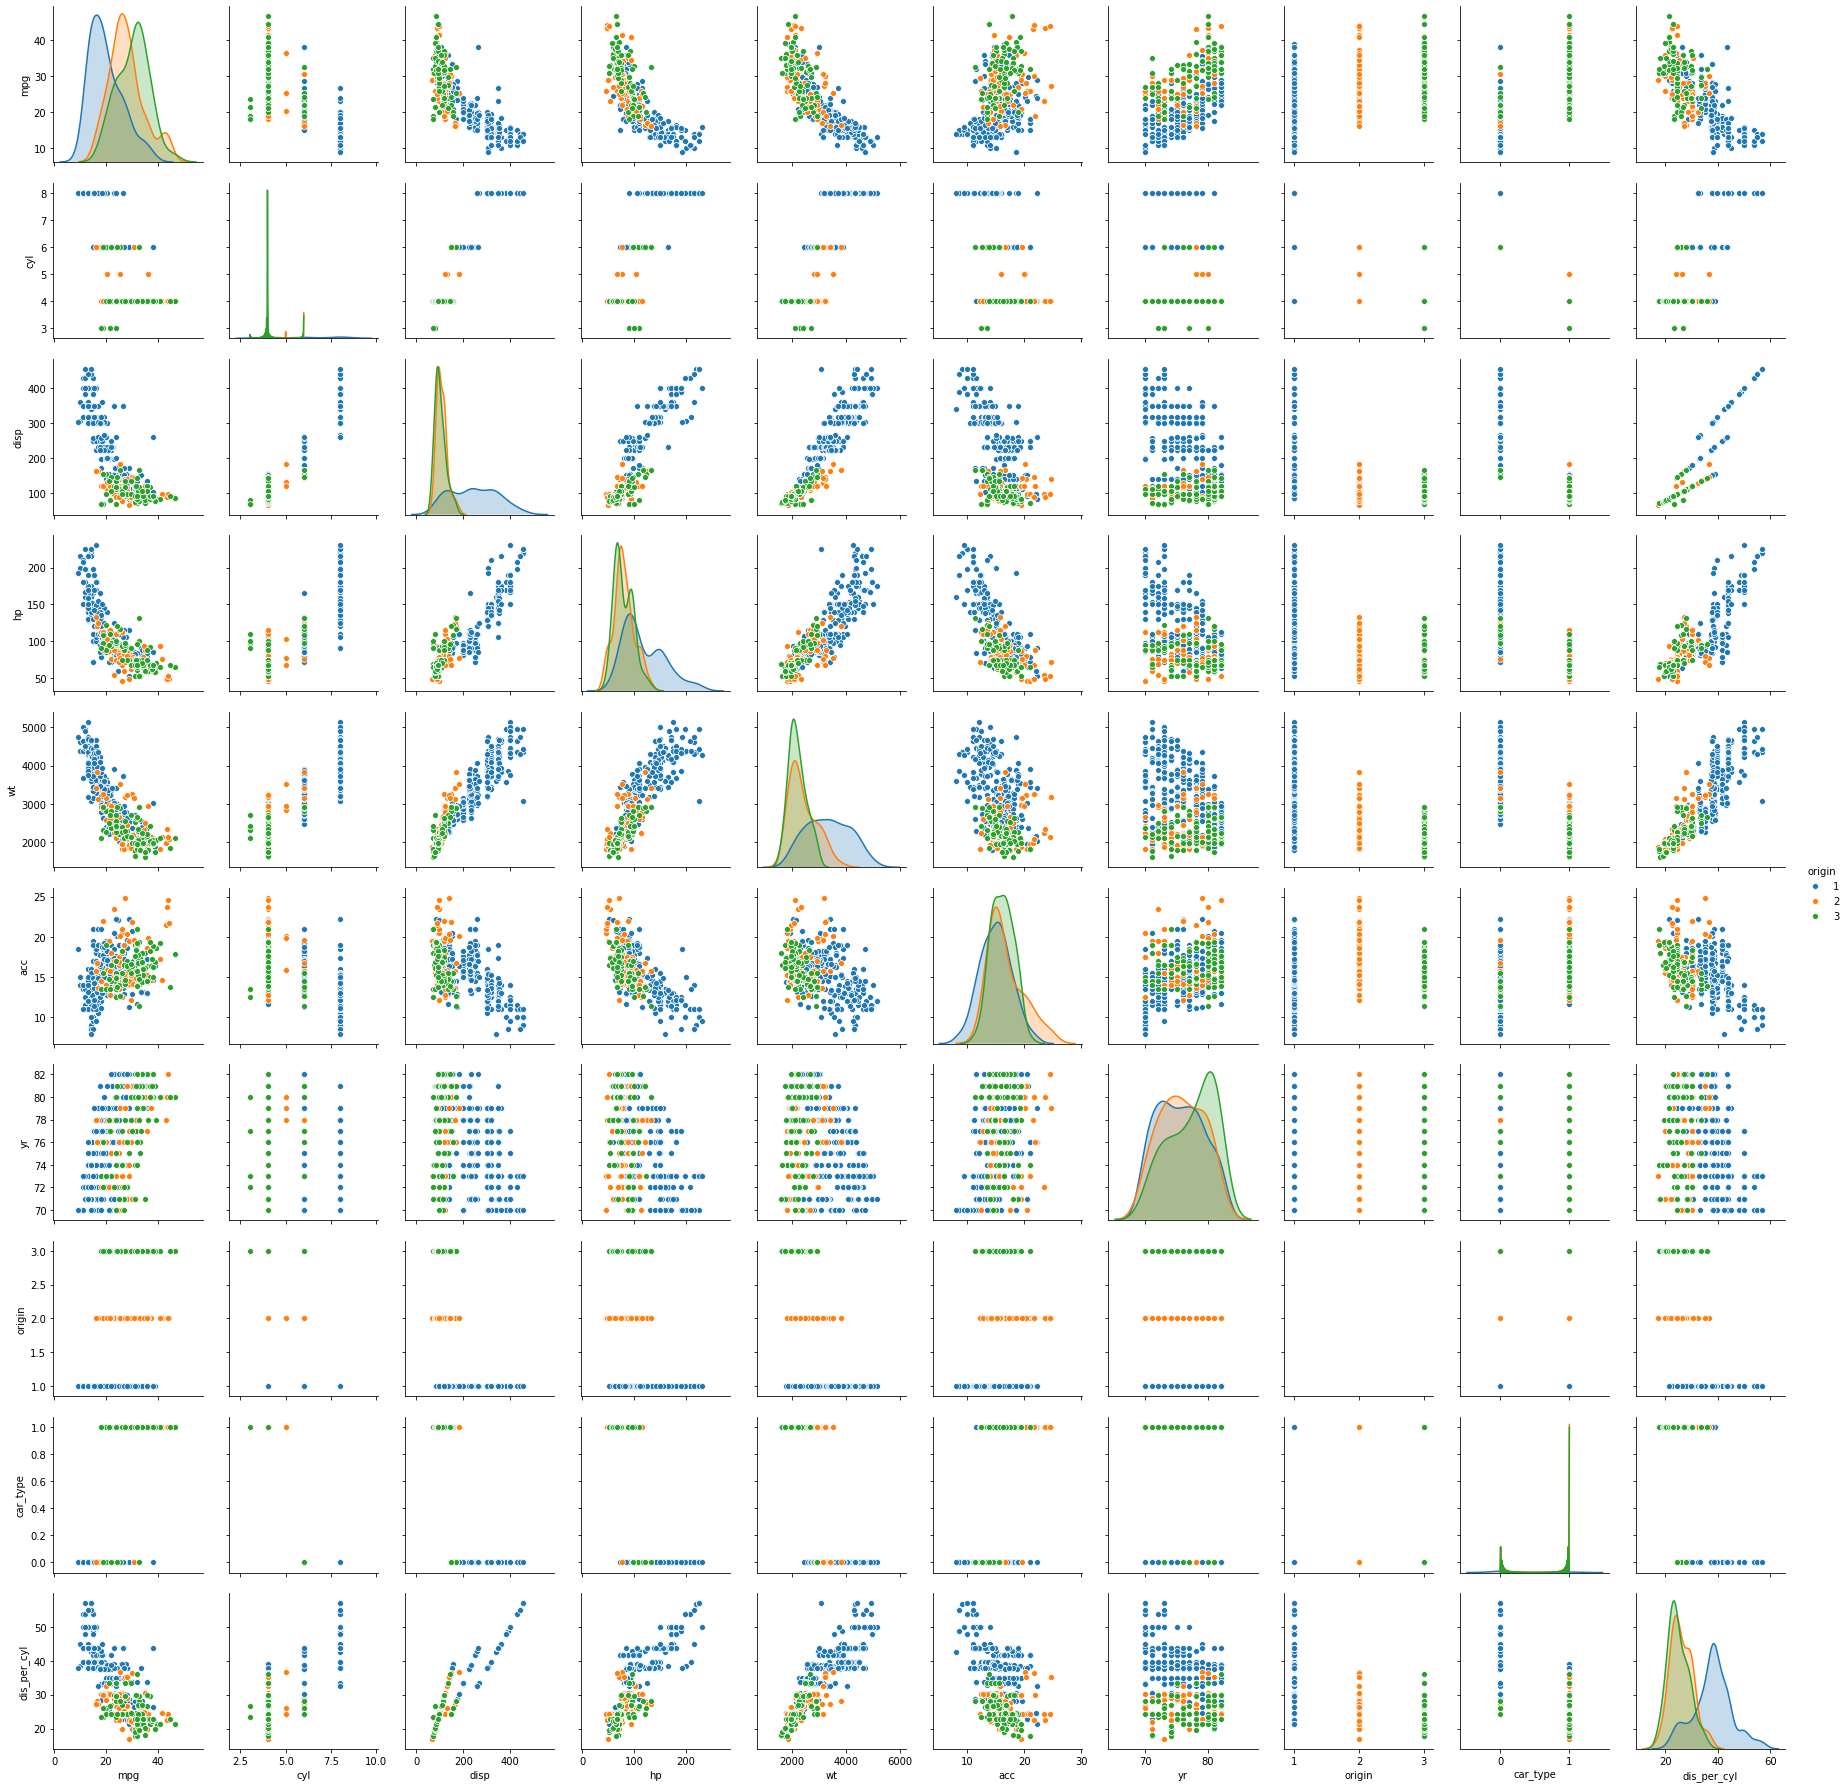

In [36]:
df_attr=df_final.iloc[:,0:9]
df_attr['dis_per_cyl']=df_attr['disp']/df_attr['cyl']
sns.pairplot(df_attr,diag_kind="kde",hue='origin')

We can observe from the above KDE plots on the diagonal, Even though there are three clusters as per the data in 'Origin' feature we can still see overall data suggests more than 3 clusters , there may be sub clusters within a cluster
[ observe the KDE for 'mpg', 'hp' etc] 

In [50]:
from scipy.stats import zscore

df_attr=df_final.loc[:,'mpg':'origin']
df_attr_z=df_attr.apply(zscore)

df_attr_z.drop(['origin','yr'],axis=1,inplace=True)

In [51]:
df_attr.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [43]:
from sklearn.cluster import KMeans

In [55]:
cluster_range = range(2,6)
cluster_errors=[]

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=5)
    clusters.fit(df_attr)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors/inertia': cluster_errors})
clusters_df

,num_clusters,cluster_errors/inertia
0,2,7.428960e+07
1,3,3.420817e+07
2,4,1.905177e+07
3,5,1.376977e+07


### Elbow Plot

Text(0.5, 0, 'No. Clusters')

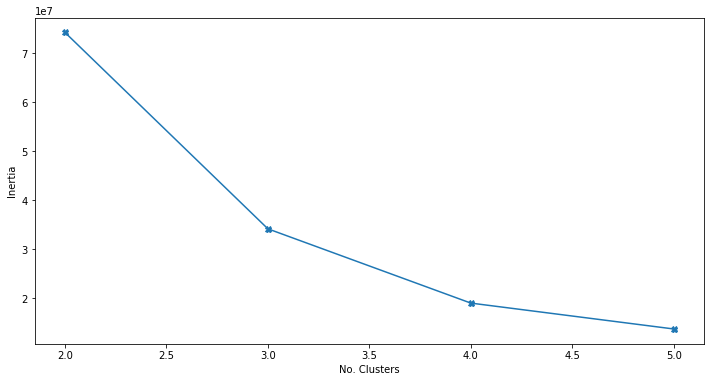

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors/inertia'],marker='X')
plt.ylabel('Inertia')
plt.xlabel("No. Clusters")

Naturally there are 3 clusters in data based on the origin of cars , however the elbow plot is conveying different story, we can see that there is significant drop in error for 4th cluster, which indicated there may be a hidden cluster

Let us try to explore further.........

### Lets build 4 clusters 

In [61]:
cluster = KMeans(n_clusters=4, random_state=42)
cluster.fit(df_attr_z)
df_attr_copy=df_attr_z.copy(deep=True)

In [62]:
centroids=cluster.cluster_centers_
centroids

array([[ 0.99149249, -0.81998551, -0.85895557, -0.91817479, -0.85174625,
         1.21960744],
       [-1.15110476,  1.4860546 ,  1.48450715,  1.50624078,  1.38753374,
        -1.06267868],
       [-0.51001261,  0.40212541,  0.29436282, -0.08700192,  0.32691222,
         0.34920732],
       [ 0.56930351, -0.84746902, -0.75211548, -0.48243632, -0.70707286,
        -0.19616096]])

In [63]:
centroid_df=pd.DataFrame(centroids,columns=list(df_attr_z))
centroid_df

,mpg,cyl,disp,hp,wt,acc
0,0.991492,-0.819986,-0.858956,-0.918175,-0.851746,1.219607
1,-1.151105,1.486055,1.484507,1.506241,1.387534,-1.062679
2,-0.510013,0.402125,0.294363,-0.087002,0.326912,0.349207
3,0.569304,-0.847469,-0.752115,-0.482436,-0.707073,-0.196161


In [64]:
prediction=cluster.predict(df_attr_z)
df_attr_z['group']=prediction

### Its difficult to interpret the numerical values of Centroids and here it is not possible to visualize the clusters, Instead we can do visual analysis by converting the centroilds and the data in the cluster into box plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DA78ABE348>,
      dtype=object)

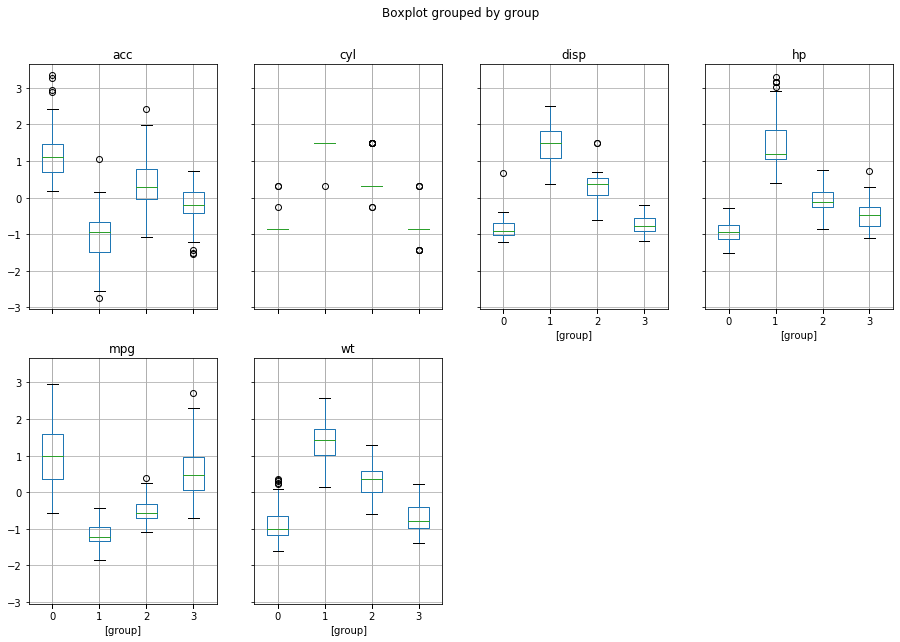

In [68]:
df_attr_z.boxplot(by='group',layout=(2,4), figsize=(15,10))

### In the above boxplot there is significant overlap of some boxplots in all the attributes except 'hp', It may be because of hidden clusters  

Let us do further analysis using scatter plot for 'hp' with other attributes [here 'mpg' since it is our target variable in supervised learning]

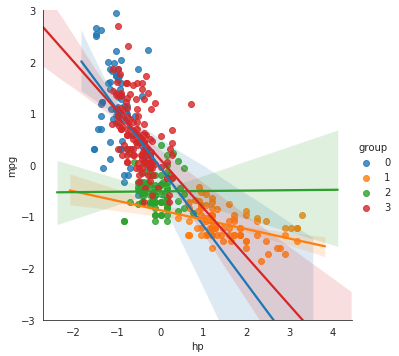

In [71]:
var ='hp'

with sns.axes_style('white'):
    plot = sns.lmplot(var,'mpg',data=df_attr_z,hue='group')
plot.set(ylim=(-3,3))

The above plot shows the possible regression lines between "hp" and "mpg"(target) for different cluster groups

##### Observations : 

- For group 1 & 2 "hp" is a bad predictor of mpg, where as it is good predictor incase of group 0 & 3

#### Conclusion : 

If we build a generalised single regression model for all clusters it may not perform well for groups such as 1 & 2, therefore we may have to build seperate models to predict "mpg" based on the groups

### Let us do hierarchial Clustering for the same data and compare the results

In [72]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [93]:
df_hier=df_attr.copy()

In [94]:
# If cophenetic co-eff is closer to 1 , better is the clustering

z = linkage(df_hier, 'average')
c, coph_dists = cophenet(z, pdist(df_hier))
c

0.7782864312116162

In [95]:
# cophenetic co-eff is 0.81 i.e 81% of original distance b/w data points is maintained in Dendogram 
# [It is measure of co-relation]

In [96]:
z.shape

(397, 4)

In [97]:
z[1:10]

array([[181.        , 198.        ,   1.00498756,   2.        ],
       [175.        , 197.        ,   1.0198039 ,   2.        ],
       [ 66.        ,  86.        ,   3.16227766,   2.        ],
       [176.        , 257.        ,   3.19374388,   2.        ],
       [219.        , 268.        ,   4.30464865,   2.        ],
       [204.        , 278.        ,   5.16333226,   2.        ],
       [240.        , 317.        ,   5.50726793,   2.        ],
       [377.        , 384.        ,   5.53263048,   2.        ],
       [294.        , 347.        ,   5.57225269,   2.        ]])

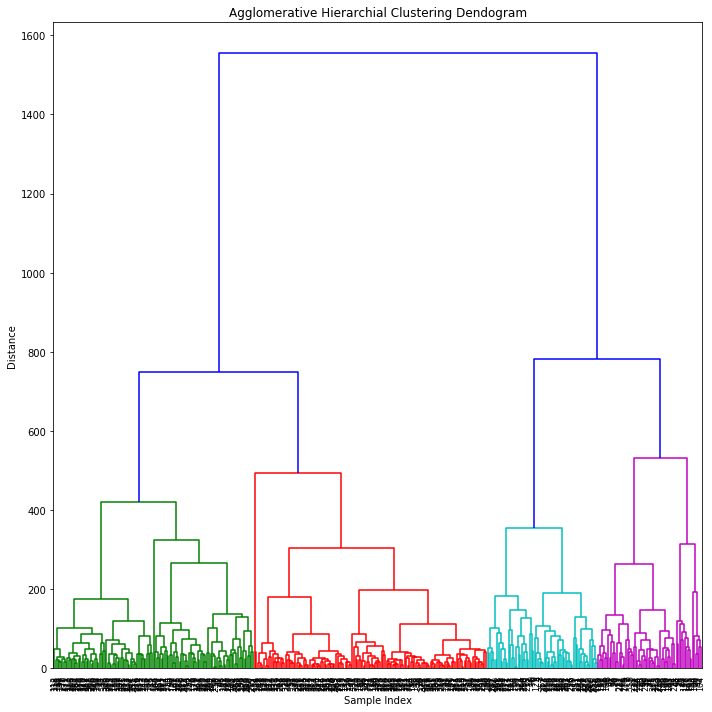

In [99]:
plt.figure(figsize=(10,10))
plt.title("Agglomerative Hierarchial Clustering Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
dendrogram(z,leaf_rotation=90.,color_threshold=600,leaf_font_size=8.)
plt.tight_layout()

In [105]:
## WARD as Linkage method

In [100]:
z = linkage(df_hier, 'ward')
c, coph_dists = cophenet(z, pdist(df_hier))
c

0.773660582320132

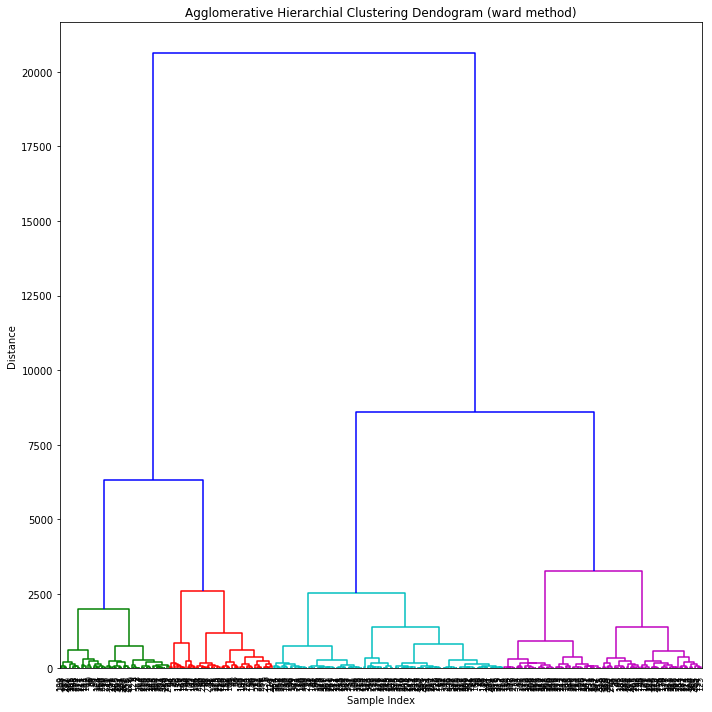

In [103]:
plt.figure(figsize=(10,10))
plt.title("Agglomerative Hierarchial Clustering Dendogram (ward method)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
dendrogram(z,leaf_rotation=90.,color_threshold=3500,leaf_font_size=8.)
plt.tight_layout()

##### WARD seems to give better results

In [106]:
## Both K means and Hierarchial clsutering are giving the same K values ( no. clusters as 4), Finally selecting no. clusters
# depends on how good we can interpret them